# Linux Day 2018 - Python & Jupyter

### Preliminari

Queste sono le celle di Jupyter, chiedi e ti viene risposto. Puoi usarle per commentare quello che fai, e puoi persino scrivere in $LaTeX$. 

Tipo, quanto è figo se scrivo:
$$
ComeComeCosa_{cls,Rd} = \sqrt{ciccio} + \left(\frac{1}{pasticcio}\right)^2
$$

Ora sul serio. La definizione di una funzione

In [1]:
def stampaQuesto(x):
    print(x)

Proviamola: mettiamo qualcosa dentro una variabile e stampiamola

In [2]:
a = 27.3
stampaQuesto(a)

27.3


In [3]:
a = "Prova provone, provola provolone"
stampaQuesto(a)

Prova provone, provola provolone


Facciamo una funzione che **somma** due numeri:

In [4]:
def sommameli(a,b):
    c = a+b
    return c

E proviamola:

In [5]:
sommameli(973491374,139879135)

1113370509

In [6]:
x='pippo?'
y=1278.9
sommameli(x,y)

TypeError: must be str, not float

### Ora si fa sul serio

Ciao *<nome tipo/a>*. Per favore, scrivi una funzione che moltiplica due numeri per far vedere a tutti quanto è facile.

In [7]:
def moltiplica(a, b):
    c=a*b
    return c



OTTIMO LAVORO <tipo/a>! Ora provala:

In [8]:
moltiplica (13,7)

91

**OTTIMO LAVORO *<tipo/a>*!**

 
  
 
   


Ora, per favore, scrivi una funzione che elenchi i numeri primi più piccoli di *n* utilizzando il Crivello di Eratostene. Hai 2 minuti.

In [ ]:
def crivello(n):
    

--------------------

--------------------

--------------------

--------------------

--------------------

In [9]:
def crivellone(n):
    multiples = []
    for i in range(2, n+1):
        if i not in multiples:
            print (i)
            for j in range(i*i, n+1, i):
                multiples.append(j)

In [10]:
crivellone(100)

2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97


### Librerie

Quando Python finisce, iniziano le librerie. Con loro, Python impara ad conoscere nuovi oggetti e ad usarli con nuove funzioni. 

#### Numpy

**Numpy** è utile per tutti i calcoli matematici, ed è richiesto da tante altre librerie.

In [11]:
import numpy

In [12]:
numpy.cos(0.67)

0.7838216658808492

In [13]:
numpy.sqrt(81)

9.0

In [15]:
import numpy as np

In particolare, **numpy** insegna a Python ad usare l'oggetto *array*, cioè un vettore o una matrice a N dimensioni!

In [16]:
matrice = np.array([[1,2],[3,4]])
print(matrice)

[[1 2]
 [3 4]]


In [17]:
vettore = matrice[0][:]
print(vettore)

[1 2]


Calcolo matriciale!

$$
    \begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix} \cdot \begin{pmatrix} 1 \\ 2 \end{pmatrix} = \begin{pmatrix} 1 + 4 \\ 3 + 8 \end{pmatrix} = \begin{pmatrix} 5 \\ 11 \end{pmatrix}
$$

In [18]:
np.dot(matrice, vettore)

array([ 5, 11])

#### Scipy

**Scipy** è costruita su *numpy* ed è zeppa di funzioni utili per un sacco di cose diverse.

In [24]:
import scipy as sp
import scipy.optimize as opt

Cercare i minimi di una funzione complicata in *n* dimensioni? Nessun problema:

$$
funzioneComplicata(x,y) = \sin\left({\sqrt{x^2 + (y-0.4)^2}}\right)
$$

In [20]:
def funzioneComplicata(variabili):
    x = variabili[0]
    y = variabili[1]
    return np.sin(np.sqrt(x**2 + (y-0.4)**2))

In [26]:
minimo = opt.minimize(lambda x: funzioneComplicata(x), [0,0])
minimo

      fun: 8.524765654772699e-09
 hess_inv: array([[ 8.72831288e-09, -2.13675924e-09],
       [-2.13675924e-09,  1.13767571e-08]])
      jac: array([-0.07648483,  0.40477772])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 392
      nit: 3
     njev: 95
   status: 2
  success: False
        x: array([-8.05901045e-09,  3.99999997e-01])

Lo volete vedere disegnato? Ok.

In [27]:
#Per fare i plot
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [28]:
fig = plt.figure(num=None, figsize=(12, 8), dpi=300, facecolor='w', edgecolor='r')
ax = fig.add_subplot(111, projection='3d')

#I dati da disegnare
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x, y)
Z = funzioneComplicata([X,Y])

ax.plot_surface(X, Y, Z)

ax.xaxis.pane.fill = False
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('funzioneComplicata')

Text(0.5,0,'funzioneComplicata')

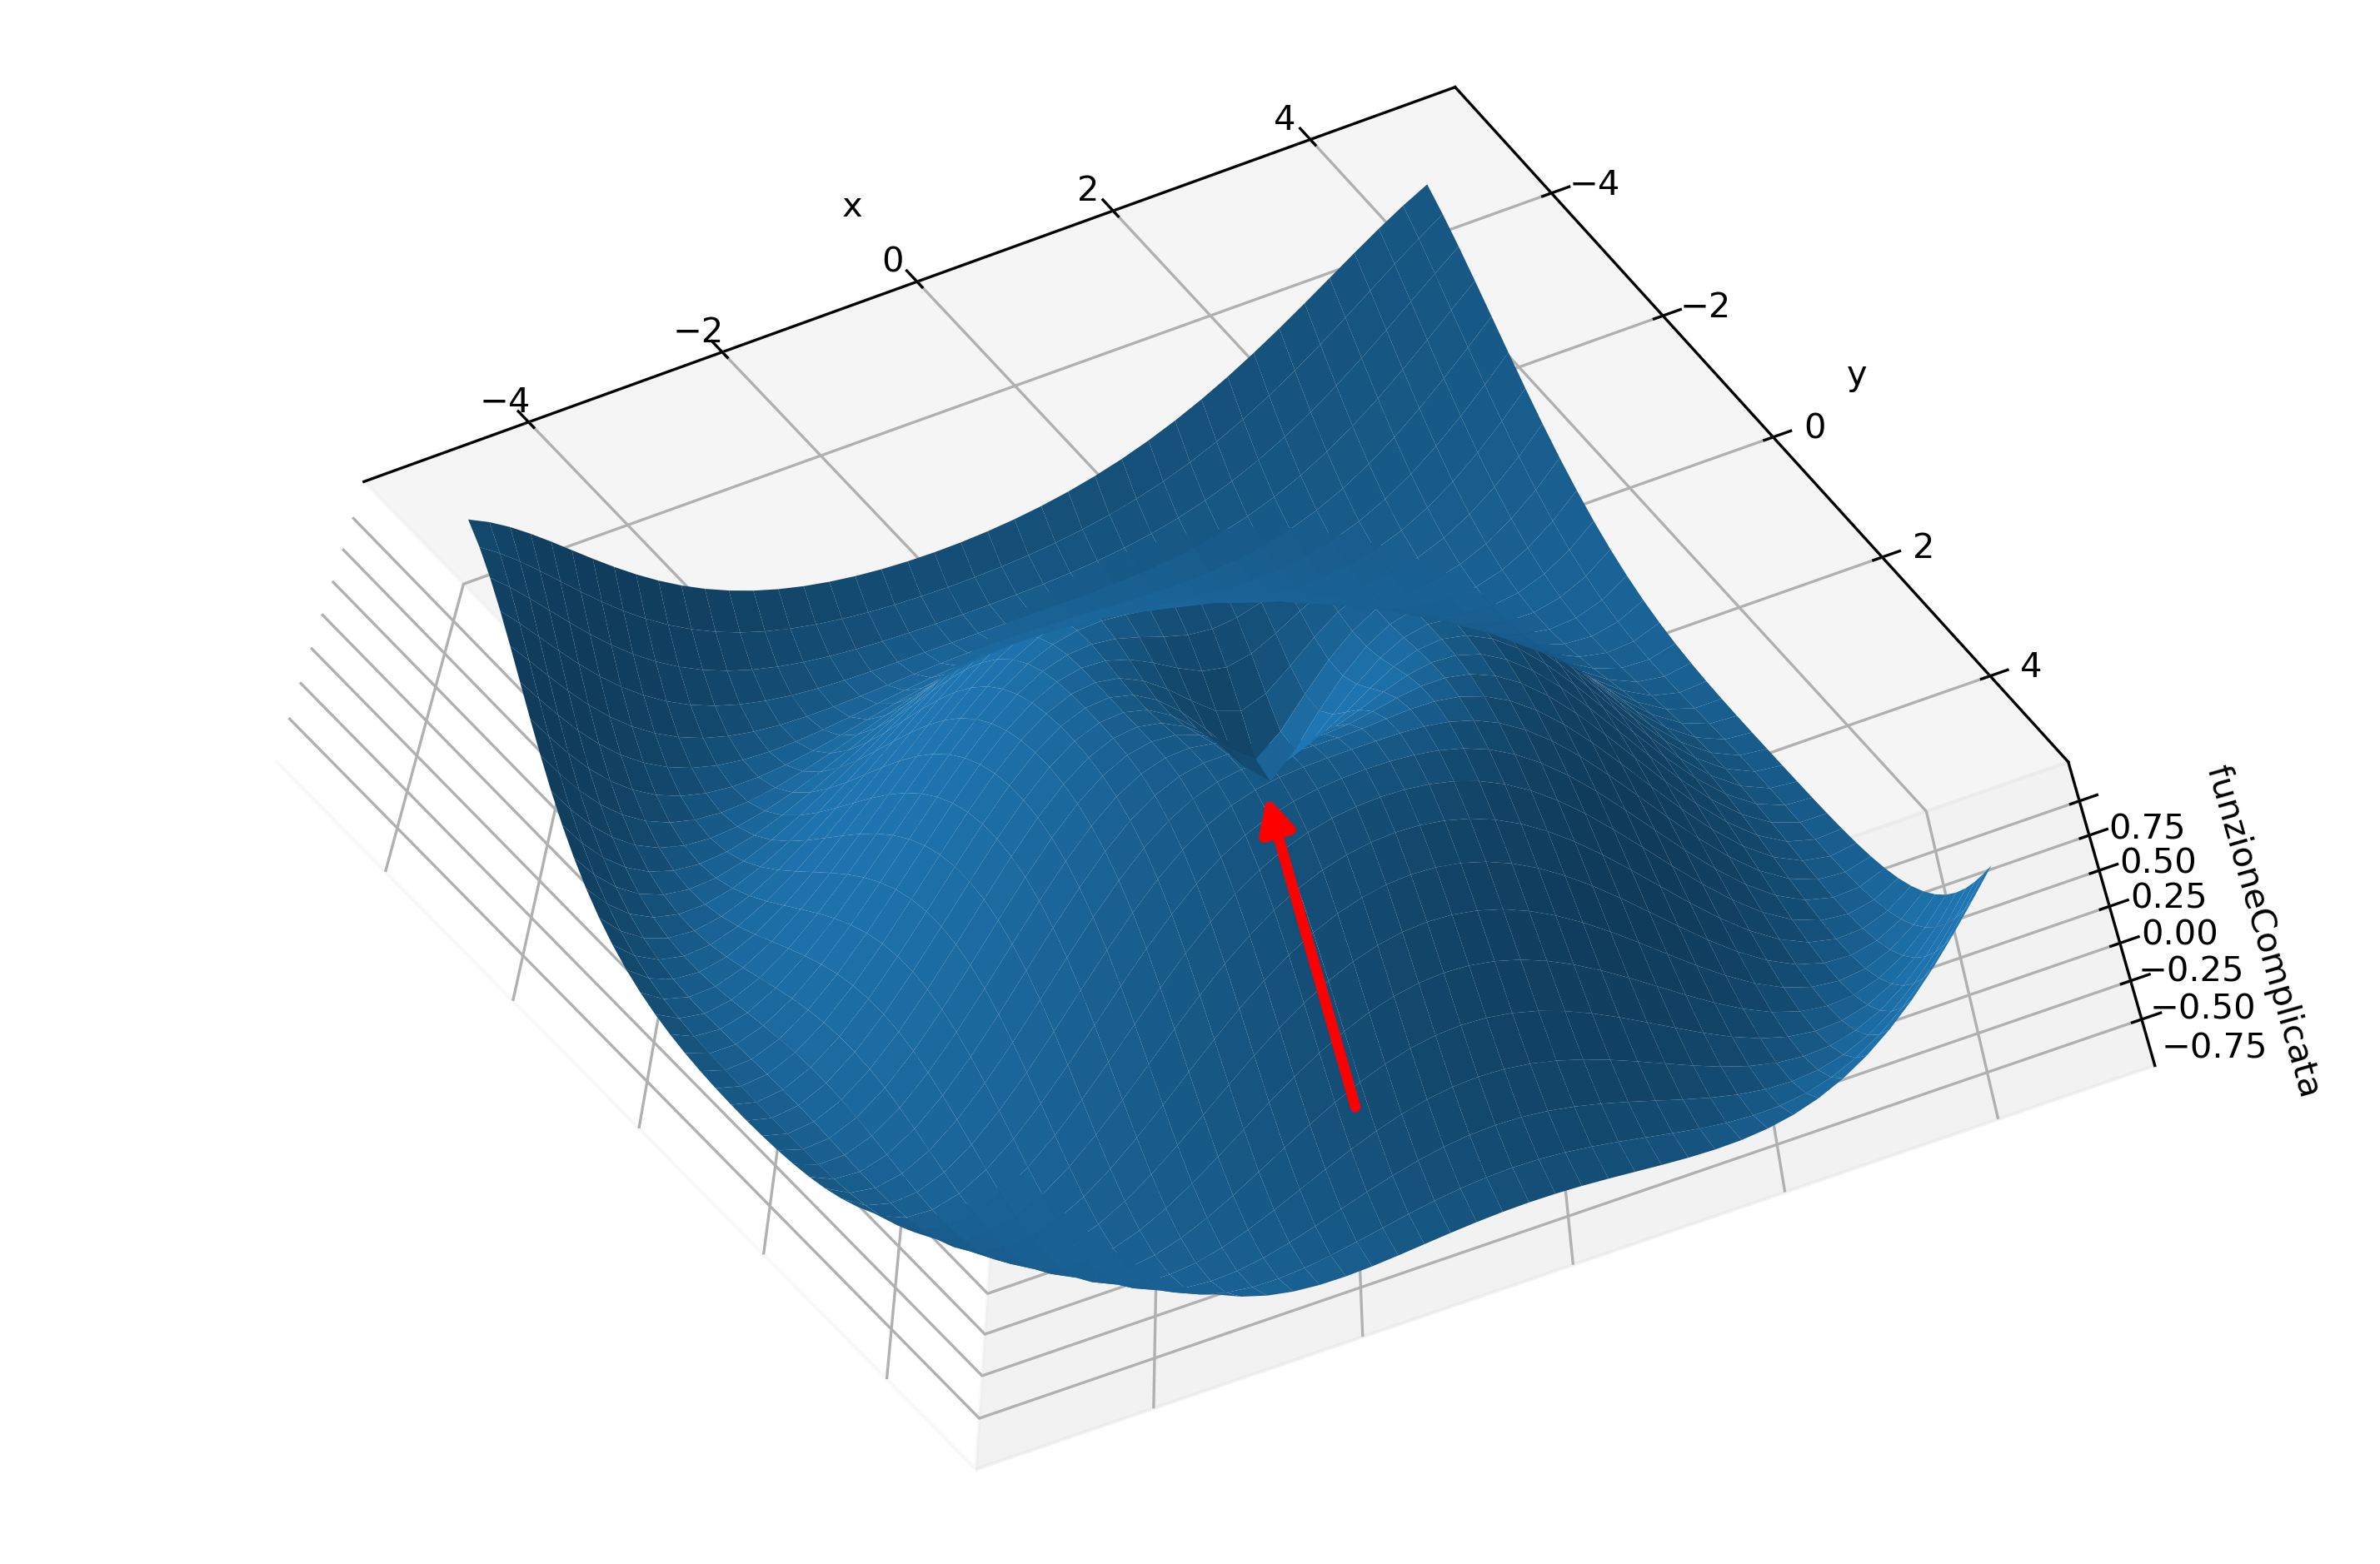

In [29]:
fig = plt.figure(num=None, figsize=(12, 8), dpi=300, facecolor='w', edgecolor='r')
ax = fig.add_subplot(111, projection='3d')

x_min = [minimo['x'][0] + 0.5, minimo['x'][0]]
y_min = [minimo['x'][1] + 0.5, minimo['x'][1]]
z_min = [minimo['fun'] - 2, minimo['fun']]

from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        
freccia = Arrow3D(x_min, y_min, z_min, mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="r")
ax.add_artist(freccia)

ax.plot_surface(X, Y, Z)

ax.xaxis.pane.fill = False
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('funzioneComplicata')


ax.view_init(elev=-70)

Sempre con **scipy**: tutta l'analisi dati che riuscite a sopportare! 

Importare un file audio e disegnare lo spettro di frequenza? **Nemo Problemo**

In [30]:
from scipy.io import wavfile #per importare ed aprire i file audio in formato wav
from scipy.fftpack import fft #per fare una FFT
from scipy.fftpack import fftfreq #to perform a fft

In [31]:
import IPython
IPython.display.Audio("./audio/cicciopasticcio.wav")

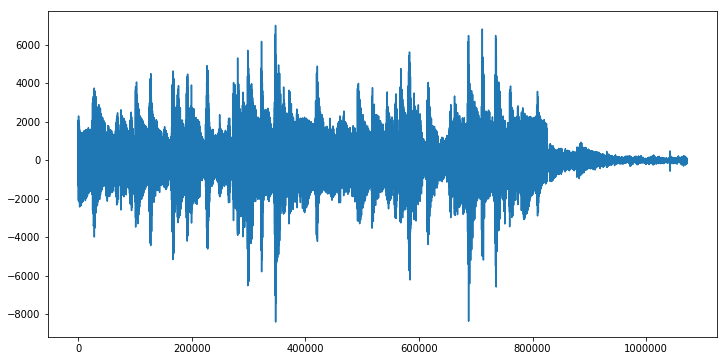

In [32]:
fs, a = wavfile.read('./audio/cicciopasticcio.wav')
dati = [(ele/2**16) for ele in a]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(0,len(dati)), a)

In [33]:
c = fft(dati)
d  = len(c)/2
k  = np.arange(len(a))
T  = len(a)/float(fs)
frqLabel = k/T
datoloni= np.sqrt(abs(c))
ics = range(0, len(datoloni))
valuta = 1./(frqLabel[1]-frqLabel[0])

In [34]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
ax.plot(frqLabel, datoloni)
#ax.set_yscale('log')

ax.axis(xmin = 0,
       xmax = 500,
       ymin = 1,
       ymax = 50)

(0, 500, 1, 50)

E con **scipy** si può fare molto, molto altro ancora!

#### Matplotlib

E per fare quei fantastici disegni? E persino (se possibile) disegni migliori? **Matplotlib**

In [35]:
import matplotlib.pyplot as plt

Disegnamo alcuni punti collegati da una linea. Per prima cosa bisogna definire i dati.

In [36]:
x = [2015, 2016, 2017, 2018, 2019, 2020]

y = [346117, 359187, 560380, 594150, 604150, 614150]

Ora possiamo disegnarli. È tanto semplice quanto chiedere a Python:

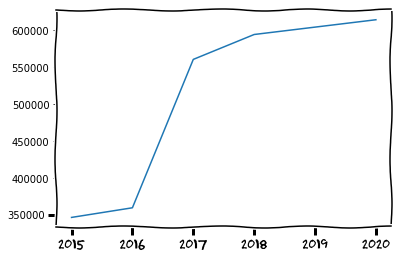

In [39]:
plt.plot(x,y)

Certo, così è un po' spoglio e mancano informazioni. Ma con pochi comandi in più diventa:

In [38]:
spesa_libero = np.zeros(len(x))
costo_borsa = 6000
numero_borse = [soldi_spesi/costo_borsa for soldi_spesi in y]

#Inizializzazione plot e titolo
fig, ax = plt.subplots(figsize=(12,7))
title_style = {'horizontalalignment':'center', 'verticalalignment':'center',
               'fontsize':'30', 'y':'0.93'}
fig.suptitle("Quanto spende l'Unipi in licenze software?", **title_style)

#Plot su Axes 'ax'
ax.set_xlabel("Anno", fontsize=15)
ax.set_ylabel("Spesa", fontsize=15)
ax.plot(x, y, 'o-', label="Spesa con SW proprietario (attuale)")
ax.plot(x, spesa_libero, 'o-', label="Spesa con SW libero (proiezione)")
ax.legend(fontsize=15)
ax.grid()

E si possono fare tanti plot diversi, basta guardare la galleria di Matplotlib!